#**Exploratory Data Analysis**
### **Hypothesis**: The impact of social media use on mental health is stronger for individuals under 30 compared to those 30 and older.

In [ ]:
import pandas as pd
mental_health_df = pd.read_csv('mental_health_clean.csv')
social_media_df = pd.read_csv('social_media_clean.csv')

In [ ]:
mental_health_df.head(5)

In [ ]:
social_media_df.head(5)

### First Attempt

In [ ]:
print(mental_health_df.columns)
column_names = mental_health_df.columns.tolist()
print(column_names)

print(social_media_df.columns)
column_names2 = social_media_df.columns.tolist()
print(column_names2)

In [ ]:
mental_health_df['Age'] = pd.to_numeric(mental_health_df['Age'], errors='coerce')
mental_health_df = mental_health_df.dropna(subset=['Age'])
mental_health_df['age_group'] = mental_health_df['Age'].apply(lambda x: '<30' if x < 30 else '30+')
# Convert stress levels to ordered numeric values
stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
mental_health_df['Stress_Level_Numeric'] = mental_health_df['Stress_Level'].map(stress_map)

In [ ]:
print(mental_health_df['Stress_Level'].unique())


['Low' 'High' 'Medium']


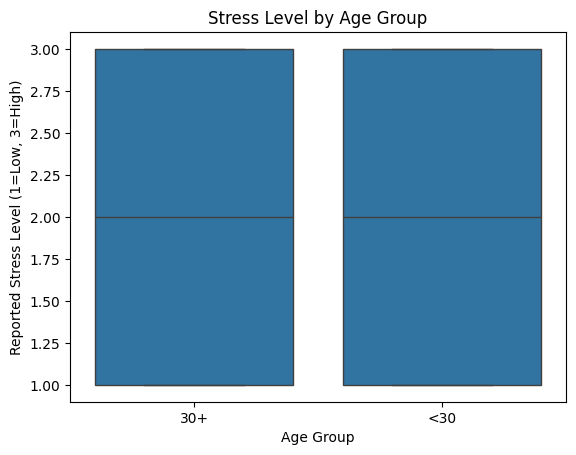

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = mental_health_df.dropna(subset=['Stress_Level_Numeric', 'age_group'])

sns.boxplot(data=plot_df, x='age_group', y='Stress_Level_Numeric')
plt.title('Stress Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Reported Stress Level (1=Low, 3=High)')
plt.show()


In [ ]:
pd.crosstab(mental_health_df['age_group'], mental_health_df['Stress_Level'])


Stress_Level,High,Low,Medium
age_group,,,
30+,6255,6093,6344
<30,2101,2083,2122


Plot has no visual difference because counts are nearly identical in distribution within each group (~1/3 for each stress level).

### Second Attempt

In [ ]:
print(mental_health_df['Social_Media_Usage'].unique())


[3.4 5.4 3.6 6.  5.7 5.5 2.7 3.7 1.4 3.9 4.2 3.  4.  4.6 2.8 2.4 4.5 4.4
 4.3 1.8 4.1 4.8 0.9 0.7 5.9 2.9 4.9 1.  0.8 5.  5.2 3.3 5.1 5.8 2.  0.6
 1.1 1.2 4.7 5.6 3.8 2.3 2.1 2.2 2.6 1.5 1.3 5.3 3.5 3.1 1.6 1.7 2.5 1.9
 3.2 0.5]


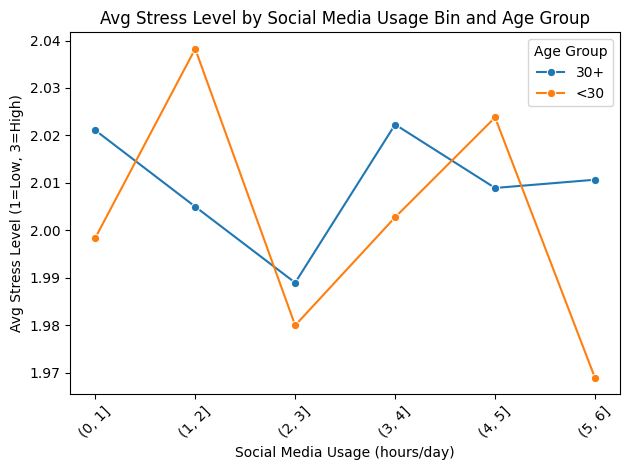

In [ ]:
import numpy as np

#social media usage into ranges
df2['SM_Usage_Bin'] = pd.cut(df2['Social_Media_Usage'], bins=np.arange(0, 7, 1))
df2['SM_Usage_Bin_Label'] = df2['SM_Usage_Bin'].astype(str)

# group by usage bin + age group, calculate average stress level
grouped = df2.groupby(['SM_Usage_Bin_Label', 'age_group'])['Stress_Level_Numeric'].mean().reset_index()
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=grouped, x='SM_Usage_Bin_Label', y='Stress_Level_Numeric', hue='age_group', marker='o')
plt.xticks(rotation=45)
plt.title('Avg Stress Level by Social Media Usage Bin and Age Group')
plt.xlabel('Social Media Usage (hours/day)')
plt.ylabel('Avg Stress Level (1=Low, 3=High)')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


### Third Attempt

In [ ]:
social_media_df['age'] = pd.to_numeric(social_media_df['age'], errors='coerce')
social_media_df = social_media_df.dropna(subset=['age'])

social_media_df['age_group'] = social_media_df['age'].apply(lambda x: '<30' if x < 30 else '30+')


In [ ]:
# Map string ranges to numeric midpoints
usage_map = {
    'Less than an Hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 6
}

social_media_df['sm_time_numeric'] = social_media_df['sm_time_daily'].map(usage_map)


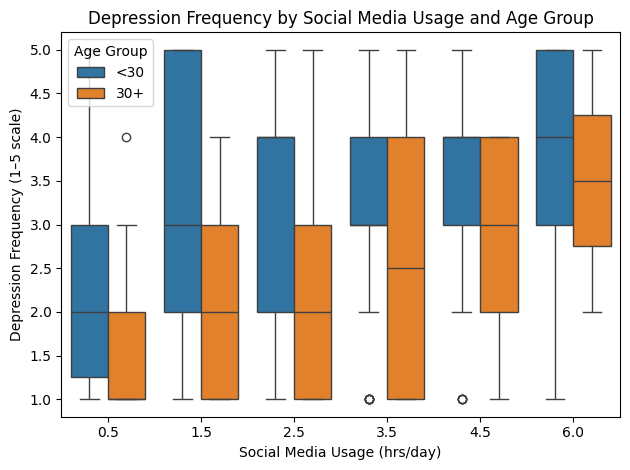

In [ ]:
df3 = social_media_df.dropna(subset=['sm_time_numeric', 'depressed_freq', 'age_group'])

sns.boxplot(data=df3, x='sm_time_numeric', y='depressed_freq', hue='age_group')
plt.xlabel('Social Media Usage (hrs/day)')
plt.ylabel('Depression Frequency (1–5 scale)')
plt.title('Depression Frequency by Social Media Usage and Age Group')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [ ]:
pip install plotly


In [ ]:
import plotly.io as pio
import plotly.graph_objects as go

fig = pio.from_json(open('json_plot.json', 'r').read())
fig.show()
